In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf

In [2]:
no2 = pd.read_csv('C:/Users/alket/OneDrive/Desktop/ProgettoForecasting/datasets/CleanData_No2.csv')

In [3]:
serie = no2['NO2 (Biossido di azoto)'].values

In [7]:
def split_sequence(data, n_input, n_output):
    X, Y = list(), list()
    
    for i in range(len(data)):
        end_ix = n_input + i
        out_end_ix = end_ix + n_output
        
        if out_end_ix > len(data):
            break
            
        seq_x, seq_y = data[i:end_ix], data[end_ix:out_end_ix]
        
        X.append(seq_x)
        Y.append(seq_y)
        
    return np.array(X), np.array(Y)

In [8]:
nr_input_steps = 12
nr_output_steps = 4
X, y = split_sequence(serie, nr_input_steps, nr_output_steps)

In [9]:
counter = 0
for i in range(len(X)):
    print(X[i], y[i])
    counter += 1
    if counter > 3 : break

[16. 26. 25. 24. 32. 21. 18. 26. 29. 29. 22. 23.] [27. 24. 23. 28.]
[26. 25. 24. 32. 21. 18. 26. 29. 29. 22. 23. 27.] [24. 23. 28. 36.]
[25. 24. 32. 21. 18. 26. 29. 29. 22. 23. 27. 24.] [23. 28. 36. 49.]
[24. 32. 21. 18. 26. 29. 29. 22. 23. 27. 24. 23.] [28. 36. 49. 54.]


In [10]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


In [11]:
size = 0.80
size_X = int(len(X)*size) 
size_y = int(len(y)*size)
X_train, y_train = X[:size_X], y[:size_y]
X_test, y_test = X[size_X:], y[size_y:]

In [13]:
# define model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(nr_input_steps, n_features)))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2)) 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(150, activation='relu')) 
model.add(tf.keras.layers.Dense(nr_output_steps)) 
model.compile(optimizer='adam', loss='mse', metrics = ['accuracy'])

# fit model
history = model.fit(X_train, y_train, validation_split=0.2,batch_size=32, epochs=500, verbose=2)


Epoch 1/500
35/35 - 0s - loss: 314.8592 - accuracy: 0.2136 - val_loss: 46.2306 - val_accuracy: 0.4043
Epoch 2/500
35/35 - 0s - loss: 147.0385 - accuracy: 0.3523 - val_loss: 42.9261 - val_accuracy: 0.4106
Epoch 3/500
35/35 - 0s - loss: 139.2708 - accuracy: 0.4160 - val_loss: 40.9143 - val_accuracy: 0.4458
Epoch 4/500
35/35 - 0s - loss: 132.6186 - accuracy: 0.4494 - val_loss: 39.2505 - val_accuracy: 0.4910
Epoch 5/500
35/35 - 0s - loss: 128.2022 - accuracy: 0.4472 - val_loss: 38.2466 - val_accuracy: 0.4819
Epoch 6/500
35/35 - 0s - loss: 126.0366 - accuracy: 0.4523 - val_loss: 38.1084 - val_accuracy: 0.5027
Epoch 7/500
35/35 - 0s - loss: 123.1079 - accuracy: 0.4469 - val_loss: 37.0487 - val_accuracy: 0.5099
Epoch 8/500
35/35 - 0s - loss: 121.5832 - accuracy: 0.4582 - val_loss: 36.5093 - val_accuracy: 0.4774
Epoch 9/500
35/35 - 0s - loss: 120.8361 - accuracy: 0.4528 - val_loss: 36.3045 - val_accuracy: 0.5117
Epoch 10/500
35/35 - 0s - loss: 119.5284 - accuracy: 0.4582 - val_loss: 35.9595 - 

Epoch 81/500
35/35 - 0s - loss: 101.4485 - accuracy: 0.4537 - val_loss: 40.8438 - val_accuracy: 0.4323
Epoch 82/500
35/35 - 0s - loss: 101.4696 - accuracy: 0.4456 - val_loss: 38.7567 - val_accuracy: 0.4495
Epoch 83/500
35/35 - 0s - loss: 101.9866 - accuracy: 0.4526 - val_loss: 34.7990 - val_accuracy: 0.4657
Epoch 84/500
35/35 - 0s - loss: 101.5847 - accuracy: 0.4481 - val_loss: 36.8241 - val_accuracy: 0.4377
Epoch 85/500
35/35 - 0s - loss: 101.6016 - accuracy: 0.4494 - val_loss: 39.0956 - val_accuracy: 0.4341
Epoch 86/500
35/35 - 0s - loss: 101.4413 - accuracy: 0.4472 - val_loss: 35.7915 - val_accuracy: 0.4540
Epoch 87/500
35/35 - 0s - loss: 101.0470 - accuracy: 0.4557 - val_loss: 37.1472 - val_accuracy: 0.4458
Epoch 88/500
35/35 - 0s - loss: 102.0816 - accuracy: 0.4490 - val_loss: 42.0299 - val_accuracy: 0.3989
Epoch 89/500
35/35 - 0s - loss: 100.9896 - accuracy: 0.4521 - val_loss: 36.3430 - val_accuracy: 0.4549
Epoch 90/500
35/35 - 0s - loss: 101.9649 - accuracy: 0.4517 - val_loss: 3

Epoch 161/500
35/35 - 0s - loss: 96.4942 - accuracy: 0.4501 - val_loss: 39.9608 - val_accuracy: 0.4377
Epoch 162/500
35/35 - 0s - loss: 97.3927 - accuracy: 0.4469 - val_loss: 43.5391 - val_accuracy: 0.4350
Epoch 163/500
35/35 - 0s - loss: 95.9457 - accuracy: 0.4438 - val_loss: 41.0274 - val_accuracy: 0.4431
Epoch 164/500
35/35 - 0s - loss: 95.9953 - accuracy: 0.4512 - val_loss: 36.6108 - val_accuracy: 0.4368
Epoch 165/500
35/35 - 0s - loss: 96.8441 - accuracy: 0.4546 - val_loss: 41.8204 - val_accuracy: 0.4206
Epoch 166/500
35/35 - 0s - loss: 96.2352 - accuracy: 0.4535 - val_loss: 43.6528 - val_accuracy: 0.4206
Epoch 167/500
35/35 - 0s - loss: 98.1997 - accuracy: 0.4487 - val_loss: 37.1075 - val_accuracy: 0.4477
Epoch 168/500
35/35 - 0s - loss: 96.7979 - accuracy: 0.4555 - val_loss: 43.2540 - val_accuracy: 0.4486
Epoch 169/500
35/35 - 0s - loss: 95.9200 - accuracy: 0.4505 - val_loss: 42.6530 - val_accuracy: 0.4215
Epoch 170/500
35/35 - 0s - loss: 97.6690 - accuracy: 0.4463 - val_loss: 3

Epoch 241/500
35/35 - 0s - loss: 92.7359 - accuracy: 0.4528 - val_loss: 40.2654 - val_accuracy: 0.4260
Epoch 242/500
35/35 - 0s - loss: 92.5108 - accuracy: 0.4557 - val_loss: 40.0025 - val_accuracy: 0.4513
Epoch 243/500
35/35 - 0s - loss: 93.6138 - accuracy: 0.4539 - val_loss: 37.2135 - val_accuracy: 0.4350
Epoch 244/500
35/35 - 0s - loss: 92.9275 - accuracy: 0.4476 - val_loss: 41.2394 - val_accuracy: 0.4341
Epoch 245/500
35/35 - 0s - loss: 92.7247 - accuracy: 0.4519 - val_loss: 43.5463 - val_accuracy: 0.4260
Epoch 246/500
35/35 - 0s - loss: 92.8222 - accuracy: 0.4555 - val_loss: 44.6537 - val_accuracy: 0.4215
Epoch 247/500
35/35 - 0s - loss: 92.9439 - accuracy: 0.4553 - val_loss: 39.1316 - val_accuracy: 0.4305
Epoch 248/500
35/35 - 0s - loss: 93.1178 - accuracy: 0.4569 - val_loss: 41.2294 - val_accuracy: 0.4287
Epoch 249/500
35/35 - 0s - loss: 92.2262 - accuracy: 0.4562 - val_loss: 42.0729 - val_accuracy: 0.4359
Epoch 250/500
35/35 - 0s - loss: 93.0625 - accuracy: 0.4523 - val_loss: 3

Epoch 321/500
35/35 - 0s - loss: 89.4959 - accuracy: 0.4573 - val_loss: 42.6139 - val_accuracy: 0.3971
Epoch 322/500
35/35 - 0s - loss: 89.9343 - accuracy: 0.4589 - val_loss: 39.5063 - val_accuracy: 0.4296
Epoch 323/500
35/35 - 0s - loss: 89.6481 - accuracy: 0.4603 - val_loss: 38.4778 - val_accuracy: 0.4070
Epoch 324/500
35/35 - 0s - loss: 89.6221 - accuracy: 0.4551 - val_loss: 42.8815 - val_accuracy: 0.4278
Epoch 325/500
35/35 - 0s - loss: 89.3375 - accuracy: 0.4555 - val_loss: 38.2396 - val_accuracy: 0.4422
Epoch 326/500
35/35 - 0s - loss: 89.6012 - accuracy: 0.4555 - val_loss: 41.2089 - val_accuracy: 0.4477
Epoch 327/500
35/35 - 0s - loss: 89.9647 - accuracy: 0.4591 - val_loss: 38.5551 - val_accuracy: 0.4097
Epoch 328/500
35/35 - 0s - loss: 90.0771 - accuracy: 0.4603 - val_loss: 39.6763 - val_accuracy: 0.4540
Epoch 329/500
35/35 - 0s - loss: 90.5033 - accuracy: 0.4492 - val_loss: 37.8955 - val_accuracy: 0.4449
Epoch 330/500
35/35 - 0s - loss: 91.8469 - accuracy: 0.4530 - val_loss: 4

Epoch 401/500
35/35 - 0s - loss: 88.6875 - accuracy: 0.4636 - val_loss: 39.4242 - val_accuracy: 0.4341
Epoch 402/500
35/35 - 0s - loss: 87.5402 - accuracy: 0.4618 - val_loss: 41.8139 - val_accuracy: 0.4215
Epoch 403/500
35/35 - 0s - loss: 86.5573 - accuracy: 0.4593 - val_loss: 39.4410 - val_accuracy: 0.4323
Epoch 404/500
35/35 - 0s - loss: 86.7239 - accuracy: 0.4657 - val_loss: 38.4132 - val_accuracy: 0.4486
Epoch 405/500
35/35 - 0s - loss: 86.9333 - accuracy: 0.4605 - val_loss: 39.5746 - val_accuracy: 0.4377
Epoch 406/500
35/35 - 0s - loss: 86.5745 - accuracy: 0.4555 - val_loss: 40.7680 - val_accuracy: 0.4513
Epoch 407/500
35/35 - 0s - loss: 86.4016 - accuracy: 0.4677 - val_loss: 42.1018 - val_accuracy: 0.4287
Epoch 408/500
35/35 - 0s - loss: 86.2495 - accuracy: 0.4614 - val_loss: 41.2604 - val_accuracy: 0.4242
Epoch 409/500
35/35 - 0s - loss: 86.6791 - accuracy: 0.4499 - val_loss: 40.1009 - val_accuracy: 0.4531
Epoch 410/500
35/35 - 0s - loss: 86.3188 - accuracy: 0.4603 - val_loss: 4

Epoch 481/500
35/35 - 0s - loss: 83.9155 - accuracy: 0.4657 - val_loss: 39.8434 - val_accuracy: 0.4477
Epoch 482/500
35/35 - 0s - loss: 83.9279 - accuracy: 0.4693 - val_loss: 40.4461 - val_accuracy: 0.4495
Epoch 483/500
35/35 - 0s - loss: 84.5087 - accuracy: 0.4679 - val_loss: 40.4368 - val_accuracy: 0.4594
Epoch 484/500
35/35 - 0s - loss: 83.7871 - accuracy: 0.4639 - val_loss: 40.5739 - val_accuracy: 0.4269
Epoch 485/500
35/35 - 0s - loss: 83.9510 - accuracy: 0.4639 - val_loss: 40.4940 - val_accuracy: 0.4233
Epoch 486/500
35/35 - 0s - loss: 83.6463 - accuracy: 0.4661 - val_loss: 41.4046 - val_accuracy: 0.4332
Epoch 487/500
35/35 - 0s - loss: 83.6500 - accuracy: 0.4584 - val_loss: 42.3114 - val_accuracy: 0.4585
Epoch 488/500
35/35 - 0s - loss: 85.2950 - accuracy: 0.4682 - val_loss: 39.9289 - val_accuracy: 0.4413
Epoch 489/500
35/35 - 0s - loss: 84.3348 - accuracy: 0.4634 - val_loss: 45.6939 - val_accuracy: 0.4206
Epoch 490/500
35/35 - 0s - loss: 83.5851 - accuracy: 0.4600 - val_loss: 3

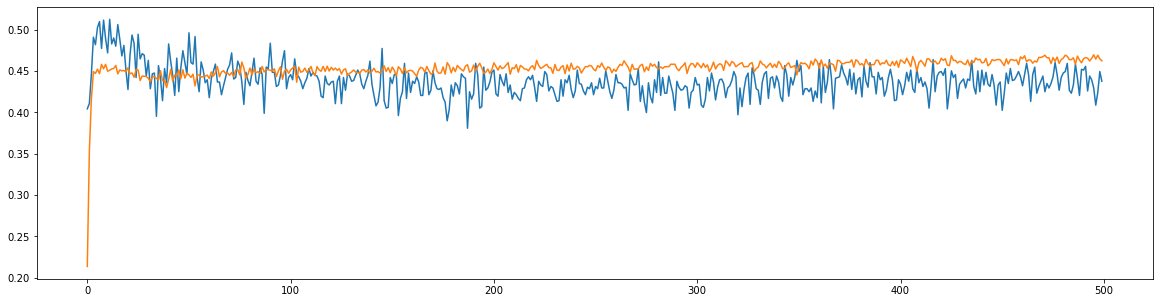

In [14]:
plt.figure(figsize = (20, 5))
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.show()

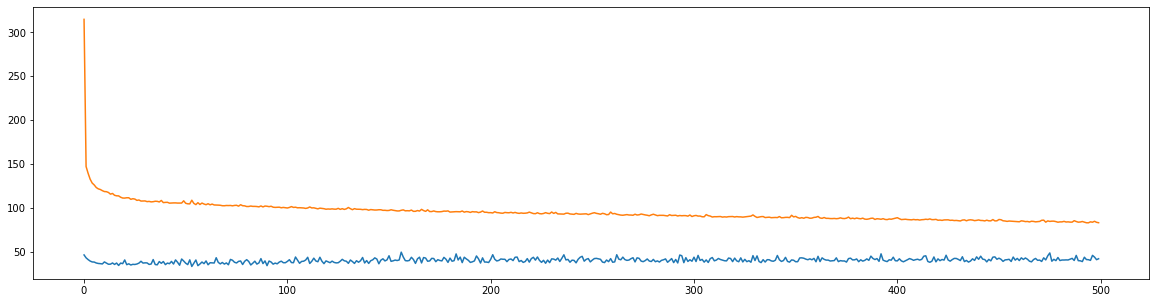

In [15]:
plt.figure(figsize = (20, 5))
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.show()

In [17]:
# perform first prediction
x_input = np.array([25., 24. ,32. ,21., 18., 26., 29., 29. ,22., 23., 27., 24.])
x_input = x_input.reshape((1, nr_input_steps, n_features)) 
yhat = model.predict(x_input, verbose=0)
print(yhat)


[[33.379414 34.22021  33.20715  31.431322]]


In [18]:
# [23.      28.       36.       49.]

In [19]:
# compute error
predictions = []
for i in range(len(X_test)):
    x_input = X_test[i].reshape((1, nr_input_steps, n_features)) 
    yhat = model.predict(x_input, verbose=0)
    predictions.append(np.around(yhat[0], decimals = 1))


In [20]:
predictions = np.array(predictions)

In [21]:
expected = y_test

In [22]:
error = abs(predictions - expected)

In [23]:
error_ext = np.reshape(error, error.shape[0]* error.shape[1])

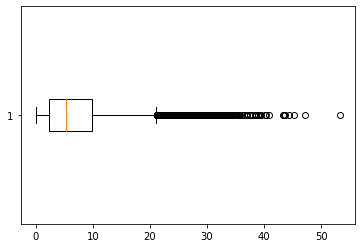

In [24]:
plt.boxplot( error_ext, vert = False)
plt.show()